In [1]:
import tensorflow as tf
import os
import json
import matplotlib.pyplot as plt

In [2]:
dataset_url = "https://storage.googleapis.com/plantdata/PlantVillage.zip"

In [3]:
dataset_files = tf.keras.utils.get_file(origin=dataset_url,fname='plantvillageDS.zip', extract=True)

856850432/856839084 [==============================] - 10s 0us/step


In [4]:
train_data_dir = os.path.join(os.path.dirname(dataset_files), "PlantVillage","train")
validation_data_dir = os.path.join(os.path.dirname(dataset_files), "PlantVillage","validation")
os.listdir(train_data_dir)

['Apple___Apple_scab',
 'Strawberry___healthy',
 'Soybean___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Tomato___Early_blight',
 'Apple___Cedar_apple_rust',
 'Tomato___healthy',
 'Corn_(maize)___Common_rust_',
 'Apple___Black_rot',
 'Squash___Powdery_mildew',
 'Potato___healthy',
 'Peach___healthy',
 'Potato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Tomato_mosaic_virus',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Corn_(maize)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Pepper,_bell___Bacterial_spot',
 'Apple___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Cherry_(including_sour)___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Potato___Late_blight',
 'Blueberry___healthy',
 'Raspberry___healthy',
 'Tomato___Late_blight',
 'Grape___Esca_(Black_Measles)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Grape___healthy',
 'Tomato___Leaf_Mold',
 '

In [5]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir)
validation_data = tf.keras.utils.image_dataset_from_directory(validation_data_dir)

Found 43444 files belonging to 38 classes.


2023-02-06 13:44:55.571481: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 13:44:55.675890: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 13:44:55.676735: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 13:44:55.679506: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 10861 files belonging to 38 classes.


In [6]:
train_data_iterator = train_data.as_numpy_iterator()
validation_data_iterator = validation_data.as_numpy_iterator()
minibatch = train_data_iterator.next()
#affichage des numéro classes du batch courant
minibatch[1]

2023-02-06 13:44:59.425537: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


array([20, 24, 10, 33,  0, 24, 24, 30, 20, 24, 28, 34,  5, 19, 15, 32, 35,
       35, 28, 31, 15, 25, 35, 31, 33, 25, 19, 28, 30, 15,  9,  1],
      dtype=int32)

# Importer fichier JSON contenant le nom correspondant a chaque numéro de classes
## source(https://github.com/obeshor/Plant-Diseases-Detector)

In [7]:
!wget https://raw.githubusercontent.com/obeshor/Plant-Diseases-Detector/master/categories.json

--2023-02-06 13:45:02--  https://raw.githubusercontent.com/obeshor/Plant-Diseases-Detector/master/categories.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2196 (2.1K) [text/plain]
Saving to: ‘categories.json’

categories.json     100%[===================>]   2.14K  --.-KB/s    in 0s      

2023-02-06 13:45:02 (30.4 MB/s) - ‘categories.json’ saved [2196/2196]



In [8]:
with open("categories.json", "r") as f:
  classes = list(json.load(f).values())
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

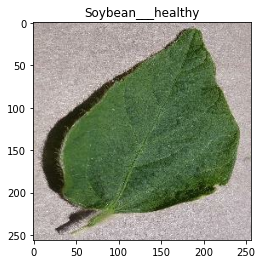

In [9]:
import random
rnd = random.randint(0,len(minibatch[0]))

plt.imshow(minibatch[0][rnd].astype('uint8'))
plt.title(classes[minibatch[1][rnd]])
plt.show()

# Mise à échelle (scaling) des valeur RGB (0->1 au lieu de 0-> 255)

In [10]:
scaled_train_data = train_data.map(lambda x, y : (x/255, y))
scaled_validation_data = validation_data.map(lambda x, y : (x/255, y))

In [11]:
train_data_iterator = train_data.as_numpy_iterator()
validation_data_iterator = train_data.as_numpy_iterator()

# Création du modèle

In [12]:
from tensorflow import keras
from keras.models import Sequential
from keras import layers

#### Ajout des couches du modèle

In [13]:
model = Sequential([
    layers.InputLayer(input_shape=(256,256,3)),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(38, activation='softmax'),
])

#### Configuration de la fonction "loss" et de l'optimizateur

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [17]:
history = model.fit(scaled_train_data, epochs=10, validation_data=scaled_validation_data)

Epoch 1/10
 820/1358 [=================>............] - ETA: 22s - loss: 1.9123 - accuracy: 0.4648

Cleanup called...


1358/1358 [==============================] - 69s 50ms/step - loss: 1.5629 - accuracy: 0.5537 - val_loss: 0.8998 - val_accuracy: 0.7180
Epoch 2/10
 819/1358 [=================>............] - ETA: 21s - loss: 0.7232 - accuracy: 0.7683

Cleanup called...


1358/1358 [==============================] - 64s 47ms/step - loss: 0.6634 - accuracy: 0.7895 - val_loss: 0.5494 - val_accuracy: 0.8227
Epoch 3/10
 820/1358 [=================>............] - ETA: 20s - loss: 0.4688 - accuracy: 0.8470

Cleanup called...


1358/1358 [==============================] - 63s 46ms/step - loss: 0.4475 - accuracy: 0.8554 - val_loss: 0.3935 - val_accuracy: 0.8736
Epoch 4/10
 821/1358 [=================>............] - ETA: 20s - loss: 0.3412 - accuracy: 0.8884

Cleanup called...


1358/1358 [==============================] - 62s 45ms/step - loss: 0.3396 - accuracy: 0.8887 - val_loss: 0.3426 - val_accuracy: 0.8904
Epoch 5/10
 821/1358 [=================>............] - ETA: 21s - loss: 0.2879 - accuracy: 0.9035

Cleanup called...


1358/1358 [==============================] - 64s 47ms/step - loss: 0.2846 - accuracy: 0.9060 - val_loss: 0.3679 - val_accuracy: 0.8805
Epoch 6/10
 821/1358 [=================>............] - ETA: 21s - loss: 0.2397 - accuracy: 0.9191

Cleanup called...


1358/1358 [==============================] - 64s 47ms/step - loss: 0.2393 - accuracy: 0.9207 - val_loss: 0.2583 - val_accuracy: 0.9162
Epoch 7/10
 820/1358 [=================>............] - ETA: 20s - loss: 0.2056 - accuracy: 0.9301

Cleanup called...


1358/1358 [==============================] - 62s 45ms/step - loss: 0.2081 - accuracy: 0.9296 - val_loss: 0.2860 - val_accuracy: 0.9073
Epoch 8/10
 818/1358 [=================>............] - ETA: 21s - loss: 0.1703 - accuracy: 0.9429

Cleanup called...


1358/1358 [==============================] - 65s 48ms/step - loss: 0.1769 - accuracy: 0.9416 - val_loss: 0.2514 - val_accuracy: 0.9216
Epoch 9/10
 821/1358 [=================>............] - ETA: 20s - loss: 0.1646 - accuracy: 0.9442

Cleanup called...


1358/1358 [==============================] - 64s 47ms/step - loss: 0.1615 - accuracy: 0.9454 - val_loss: 0.2536 - val_accuracy: 0.9234
Epoch 10/10
 820/1358 [=================>............] - ETA: 20s - loss: 0.1574 - accuracy: 0.9468

Cleanup called...


1358/1358 [==============================] - 62s 46ms/step - loss: 0.1523 - accuracy: 0.9491 - val_loss: 0.2867 - val_accuracy: 0.9114


# Performance

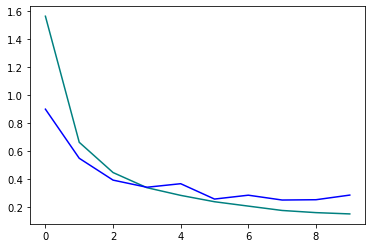

In [19]:
figure = plt.figure()
plt.plot(history.history["loss"], color="teal", label="Loss")
plt.plot(history.history["val_loss"], color="blue", label="Validation loss")
plt.show()

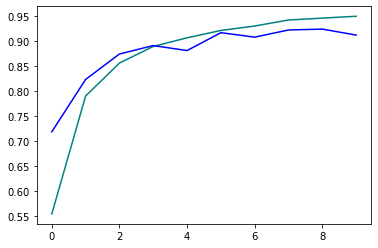

In [20]:
figure = plt.figure()
plt.plot(history.history["accuracy"], color="teal", label="Accuracy")
plt.plot(history.history["val_accuracy"], color="blue", label="Validation accuracy")
plt.show()

# Sauvegarder modèle

In [18]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','plantvillage_classifier.h5'))